## 경사 하강법(Gradient Descent)
1. 핵심 원리: "기울기의 반대 방향으로 이동" 경사 하강법의 목표는 비용 함수를 최소화하는 것이다. 기울기(미분값)는 "함수가 가장 가파르게 증가하는 방향"을 가리키므로, 기울기의 반대 방향으로 이동해야 비용을 줄일 수 있다.
 $$w := w - α\frac{∂J}{∂w}$$
    기울기: 비용 함수가 w에 대해 얼마나 빠르게 변하는지.
    부호: 기울기의 반대 방향으로 이동해 비용을 감소시킨다.
    학습률(α): 이동 크기를 조절하는 스텝 사이즈.

2. 직관적 이해: 산 내려가기 비유
시나리오: 산꼭대기(높은 비용)에서 골짜기(낮은 비용)로 내려간다고 생각한다면.
    - 기울기 방향: 발밑의 경사가 가장 급한 방향 (↑ 올라가는 방향).
    - 반대 방향: 경사의 반대(↓ 내려가는 방향)로 이동해야 골짜기에 도달

3. 수학적 증명: 테일러 근사(Taylor Approximation)
    $$J(w) \approx J(w_0) + \left. \frac{\partial J}{\partial w} \right|_{w_0} (w - w_0)$$

    목표: J(w)<J(w0)가 되도록 w를 조정.
    해결책:
    $$ w - w0 = - α\frac{∂J}{∂w} ⇒ w = w0 - α\frac{∂J}{∂w}$$

   - 테일러 급수 : 함수 f가 a∈R(실수)에서 여러번 미분 가능할 때, 다항함수로 근사한 식을 테일러 습수라고 한다.
   - 경사 하강법과의 연결
         $$J(w) \approx J(w_0) + J'(w_0)(w - w_0)$$
            - \( J(w_0) \): 현재 파라미터에서의 비용 값
            - \( J'(w_0) \): \( w_0 \)에서의 비용 함수 미분값 (기울기)
            - \( (w-w_0) \): 파라미터 변화량
         비용을 감소시키기 위한 조건:
            $$J(w) < J(w_0) \quad \Rightarrow \quad J'(w_0)(w-w_0) < 0$$
            $$w = w_0 - \alpha J'(w_0)$$

            해석:  
            - J'(w_0) > 0 일 때: w 감소 필요
            - J'(w_0) < 0 일 때: w 증가 필요

3-1. 예시
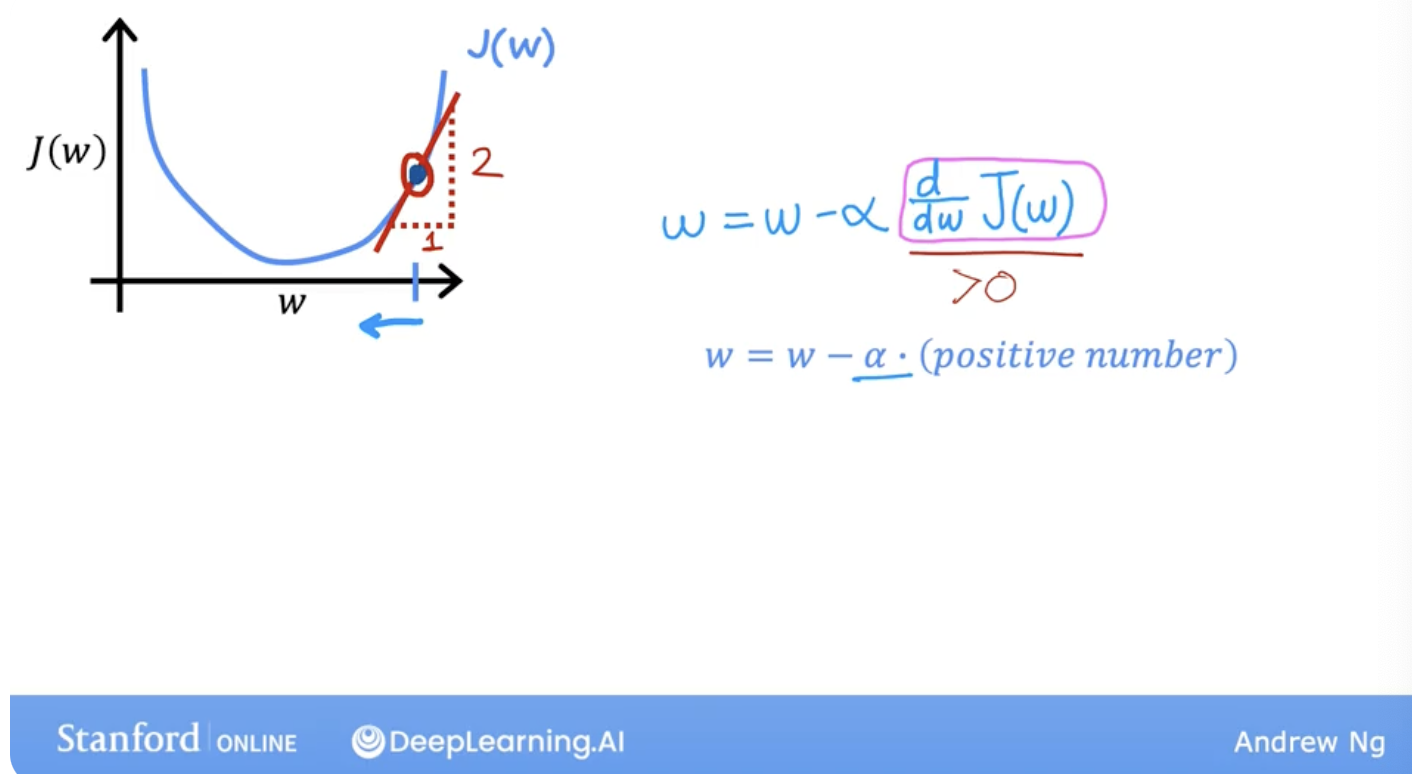



## Goals
In this lab, you will:
- automate the process of optimizing $w$ and $b$ using gradient descent.

# Problem Statement

Let's use the same two data points as before - a house with 1000 square feet sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000.

| Size (1000 sqft)     | Price (1000s of dollars) |
| ----------------| ------------------------ |
| 1               | 300                      |
| 2               | 500                      |

In [6]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i])**2
    total_cost = 1/(2 * m) * cost

    return total_cost

## Gradient descent summary
So far in this course, you have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 

In lecture, *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

## Implement Gradient Descent
You will implement gradient descent algorithm for one feature. You will need three functions. 
- `compute_gradient` implementing equation (4) and (5) above
- `compute_cost` implementing equation (2) above (code from previous lab)
- `gradient_descent`, utilizing compute_gradient and compute_cost

Conventions:
- The naming of python variables containing partial derivatives follows this pattern,$\frac{\partial J(w,b)}{\partial b}$  will be `dj_db`.
- w.r.t is With Respect To, as in partial derivative of $J(wb)$ With Respect To $b$.

In [8]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db
    

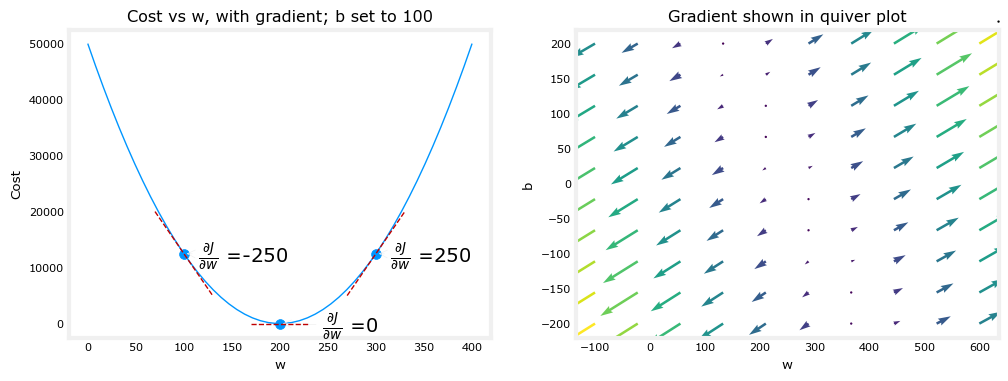

In [9]:
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()

### 1. 좌측 그래프 (∂J/∂w vs w)
- **그림 설명**:
  - **x축**: 가중치 `w` (단일 변수)
  - **y축**: 비용함수의 w에 대한 기울기 `∂J/∂w`
  - **고정 조건**: `b=100` (편의상 상수 처리)

- **키 포인트**:
  - 오른쪽 영역 (w > 최적값):
    - ∂J/∂w > 0 (비용 증가 중) → **w 줄여야 함**
  - 왼쪽 영역 (w < 최적값):
    - ∂J/∂w < 0 (비용 감소 중) → **w 늘려야 함**
  - 최적점: ∂J/∂w = 0 (업데이트 종료)

### 2. 우측 그래프 (Quiver Plot)
- **화살표 의미**:
  - 방향: ∇J = [∂J/∂w, ∂J/∂b] (최대 증가 방향)
  - 길이: 기울기 크기 (클수록 가파름)
- **실제 이동**:
  - 경사 하강법은 **-∇J 방향**으로 이동
  - 예시: 화살표가 ↗️면 실제론 ↙️로 이동

### 3. 파라미터 업데이트 공식
```python
w = w - α * ∂J/∂w  # α: 학습률(learning rate)
b = b - α * ∂J/∂b

In [10]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [11]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02


# 경사 하강법(Gradient Descent) 특징 요약  
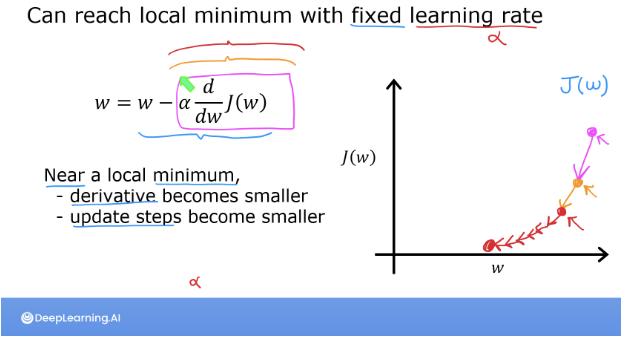
- **학습률(α) 고정** 시:  
  - 기울기가 작아지면 스텝도 작아진다
  - 따라서 α를 별도로 조정할 필요 없이 **자동으로 수렴 보장**  

> 🔍 **결론**: 해당 그림은 설명문의 **수학적 원리를 단순화해 시각적으로 표현한 것**임.  
> "비용 함수 곡선 + 기울기 감소 → 업데이트 스텝 조정"이라는 메커니즘을 공유함.  

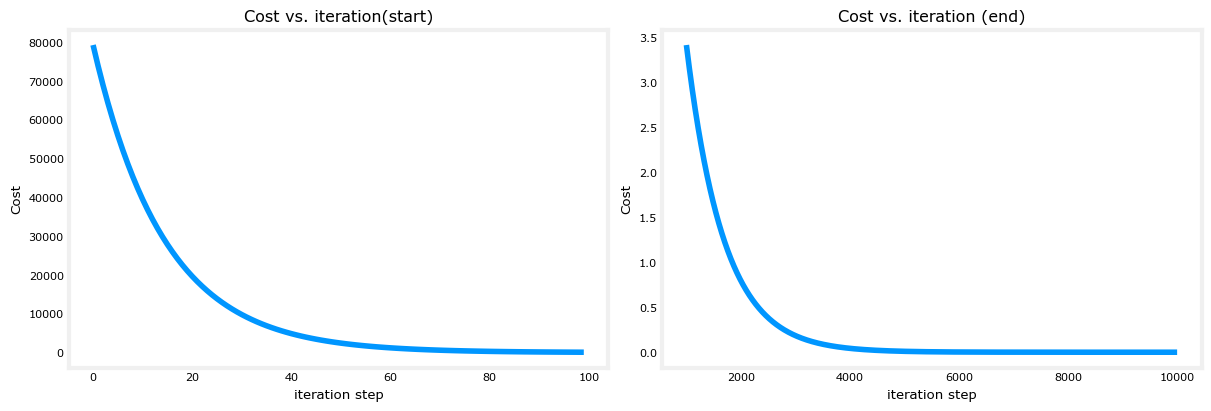

In [12]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100]) # 초기
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:]) # 후기
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

# 그래프로 알 수 있는 점
학습은 초기 100회 동안 대부분의 진전을 이루고, 이후 1000회부터는 미세 조정 단계에 진입했음을 확인할 수 있습니다.

## 초기 100회 vs 1000회 이후 학습의 시사점
1. 학습 효율성 측면
초기 100회: 비용 함수의 전체 구조를 빠르게 파악
→ 모델이 대략적인 최적점 방향으로 신속하게 접근 (빅 스텝)

1000회 이후: 미세 조정 단계 → 정밀한 최적화 (스몰 스텝)
→ 추가 1000회 학습해도 성능 향상 폭이 매우 작음

2. 하이퍼파라미터 튜닝 전략
학습률(α) 조정 필요성:

초기: 큰 α로 빠른 수렴 유도
후기: α를 점차 줄여 진동 방지 (예: α = α * 0.99)
조기 종료(Early Stopping) 고려:
→ 1000회 이후 비용 변화가 미미하면 학습 중단하여 자원 절약

3. 모델 최적화 상태 진단
과적합(Overfitting) 신호:
훈련 비용은 감소 but 검증 데이터 비용 증가 → 학습 즉시 중단
수렴 확인:
후기 그래프에서 비용이 평탄화되면 최적점 도달로 판단

4. 계산 자원 배분 최적화
실무적 적용:
초기 100회: 고성능 GPU 등으로 빠르게 실행
후기: 저사양 환경으로 전환 or 반복 횟수 축소

5. 학습 곡선의 보편성
대부분의 머신러닝 모델에서 관측되는 현상:
### 전형적인 학습 곡선 패턴
"초기: 80% 성능 향상 → 후기: 20% 향상에 80% 시간 소요"

### Predictions
Now that you have discovered the optimal values for the parameters $w$ and $b$, you can now use the model to predict housing values based on our learned parameters. As expected, the predicted values are nearly the same as the training values for the same housing. Further, the value not in the prediction is in line with the expected value.

In [13]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


## Plotting
You can show the progress of gradient descent during its execution by plotting the cost over iterations on a contour plot of the cost(w,b). 

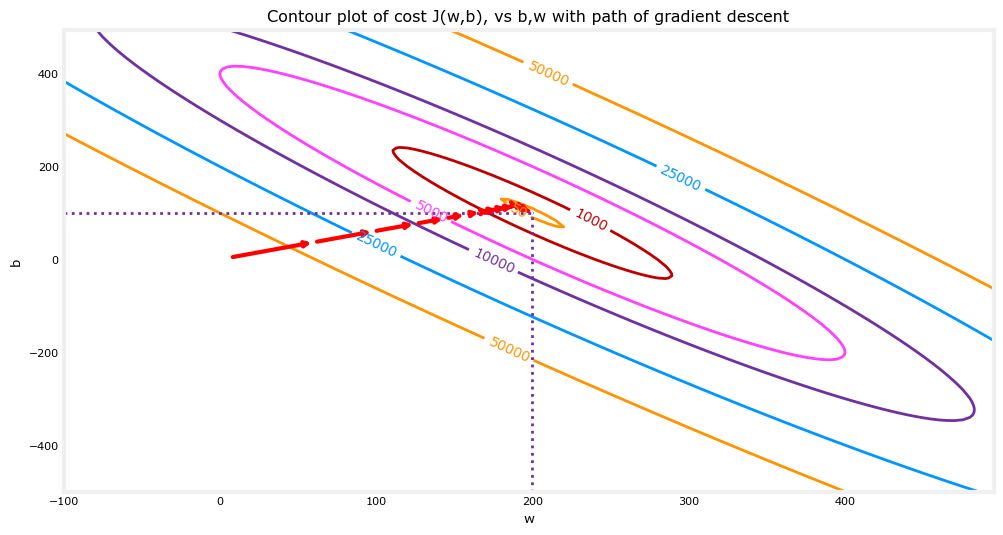

In [14]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_hist, ax)

Above, the contour plot shows the $cost(w,b)$ over a range of $w$ and $b$. Cost levels are represented by the rings. Overlayed, using red arrows, is the path of gradient descent. Here are some things to note:
- The path makes steady (monotonic) progress toward its goal.
- initial steps are much larger than the steps near the goal.

Zooming in, we can see that final steps of gradient descent. Note the distance between steps shrinks as the gradient approaches zero.

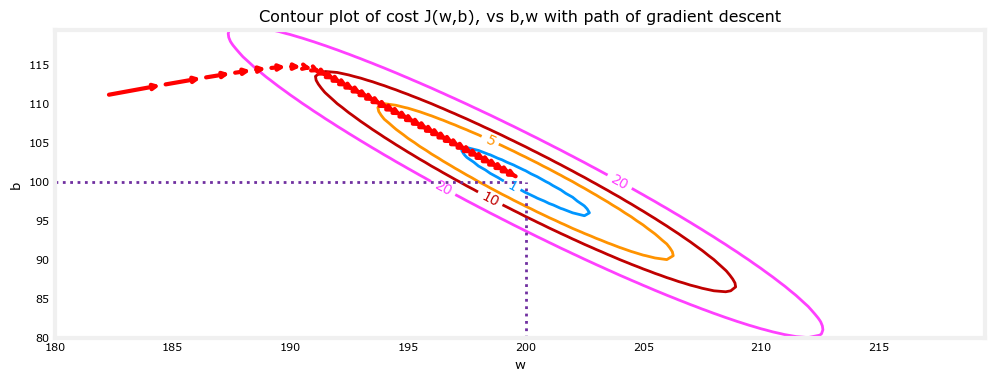

In [15]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, p_hist, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
            contours=[1,5,10,20],resolution=0.5)

### Increased Learning Rate
In the lecture, there was a discussion related to the proper value of the learning rate, $\alpha$ in equation(3). The larger $\alpha$ is, the faster gradient descent will converge to a solution. But, if it is too large, gradient descent will diverge. Above you have an example of a solution which converges nicely.

Let's try increasing the value of  $\alpha$ and see what happens:

In [16]:
# initialize parameters
w_init = 0
b_init = 0
# set alpha to a large value
iterations = 10
tmp_alpha = 8.0e-1
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)

Iteration    0: Cost 2.58e+05  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  5.200e+02, b: 3.20000e+02
Iteration    1: Cost 7.82e+05  dj_dw:  1.130e+03, dj_db:  7.000e+02   w: -3.840e+02, b:-2.40000e+02
Iteration    2: Cost 2.37e+06  dj_dw: -1.970e+03, dj_db: -1.216e+03   w:  1.192e+03, b: 7.32800e+02
Iteration    3: Cost 7.19e+06  dj_dw:  3.429e+03, dj_db:  2.121e+03   w: -1.551e+03, b:-9.63840e+02
Iteration    4: Cost 2.18e+07  dj_dw: -5.974e+03, dj_db: -3.691e+03   w:  3.228e+03, b: 1.98886e+03
Iteration    5: Cost 6.62e+07  dj_dw:  1.040e+04, dj_db:  6.431e+03   w: -5.095e+03, b:-3.15579e+03
Iteration    6: Cost 2.01e+08  dj_dw: -1.812e+04, dj_db: -1.120e+04   w:  9.402e+03, b: 5.80237e+03
Iteration    7: Cost 6.09e+08  dj_dw:  3.156e+04, dj_db:  1.950e+04   w: -1.584e+04, b:-9.80139e+03
Iteration    8: Cost 1.85e+09  dj_dw: -5.496e+04, dj_db: -3.397e+04   w:  2.813e+04, b: 1.73730e+04
Iteration    9: Cost 5.60e+09  dj_dw:  9.572e+04, dj_db:  5.916e+04   w: -4.845e+04, b:-2.99567e+04


Above,  𝑤
  and  𝑏
  are bouncing back and forth between positive and negative with the absolute value increasing with each iteration. Further, each iteration  ∂𝐽(𝑤,𝑏)∂𝑤
  changes sign and cost is increasing rather than decreasing. This is a clear sign that the learning rate is too large and the solution is diverging. Let's visualize this with a plot.
  결론: 알파가 너무 크면 분산한다.

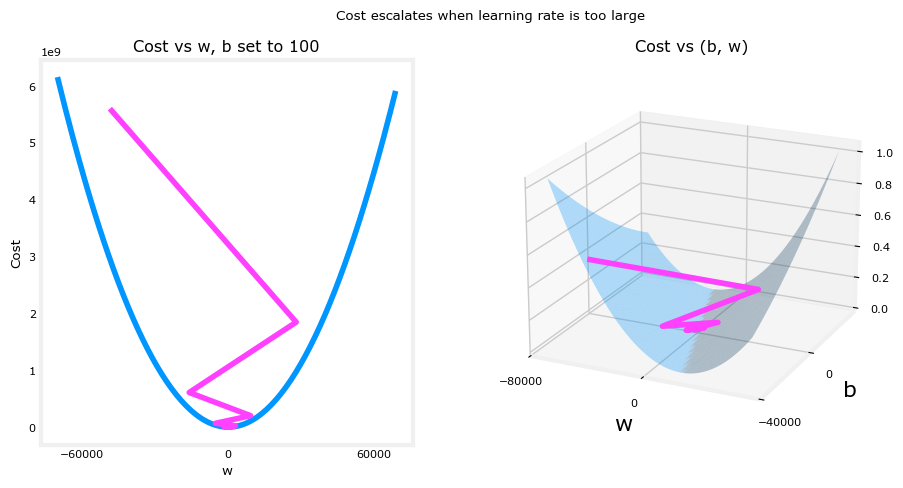

In [17]:
plt_divergence(p_hist, J_hist,x_train, y_train)
plt.show()